In [99]:
# Brian Chan
# June 2021

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [100]:
# Returns the dataframe that represents the simple moving averages for the period specified. 
# The period is given by the parameter named key. Division by 10 is performed since the data is 
# recorded in tenths of a degree (centigrade).

def produce_dataframes(df, periods, key):
    
    df.sort_values('Date', inplace=True)

    tmax = df.loc[(df['Element'] == 'TMAX')]
    tmax = tmax.drop(['ID', 'Element'], axis=1)
    tmax = tmax.groupby('Date').agg('max')
    tmax = tmax / 10
    
    tmin = df.loc[df['Element'] == 'TMIN']
    tmin = tmin.drop(['ID', 'Element'], axis=1)
    tmin = tmin.groupby('Date').agg('min')
    tmin = tmin / 10
    
    rollup = pd.DataFrame([])
    
    rollup['Data_Value_MAX'] = tmax['Data_Value'].rolling(window=periods[key]).mean()
    rollup['Data_Value_MIN'] = tmin['Data_Value'].rolling(window=periods[key]).mean()

    rollup = rollup.dropna()
    
    return rollup

In [101]:
# Plot the output of produce_dataframes.

def plot_dataframes(rollup, periods, key):

    if key != 'Daily':
    
        title = '{} Rolling Average of High and Low Temperatures'.format(key)
        top_linegraph_label = '{} rolling average (high)'.format(key)
        bottom_linegraph_label = '{} rolling averrage (low)'.format(key)
    
    else:

        title = 'Daily High and Low Temperatures'
        top_linegraph_label = 'Daily High'
        bottom_linegraph_label = 'Daily Low'
    
    plt.figure(figsize=(20,15))

    plt.plot(pd.DatetimeIndex(rollup.index), rollup['Data_Value_MAX'], color='red', alpha=0.8, label=top_linegraph_label)
    plt.plot(pd.DatetimeIndex(rollup.index), rollup['Data_Value_MIN'], color='blue', alpha=0.8, label=bottom_linegraph_label)

    plt.gca().fill_between(pd.DatetimeIndex(rollup.index),
                           rollup['Data_Value_MIN'], rollup['Data_Value_MAX'],
                           facecolor='gray',
                           alpha=0.25)

    plt.title(title, size=30)

    pretty_print(plt, periods, key)

In [102]:
# Formatting the graph to improve presentation.

def pretty_print(plt, periods, key):
    plt.box(False)
    plt.legend(prop={'size' : 18}, frameon=False)
    
    plt.xticks(pd.date_range(start=pd.to_datetime('2005-01-01') + pd.DateOffset(days=periods[key]-1), 
                             end='2015-12-31', freq='A-JUN'), size=13)
    x = plt.gca().xaxis
    for item in x.get_ticklabels():
        item.set_rotation(45)
    plt.gca().xaxis.set_tick_params(length=10, width=1.5)

    plt.ylabel('$^{\circ}$C        ', size=30)
    y = plt.gca().yaxis
    item = y.get_label()
    item.set_rotation(0)
    plt.yticks(size=15)
    plt.gca().yaxis.set_tick_params(length=7, width=1.2)

In [103]:
df = pd.read_csv('fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

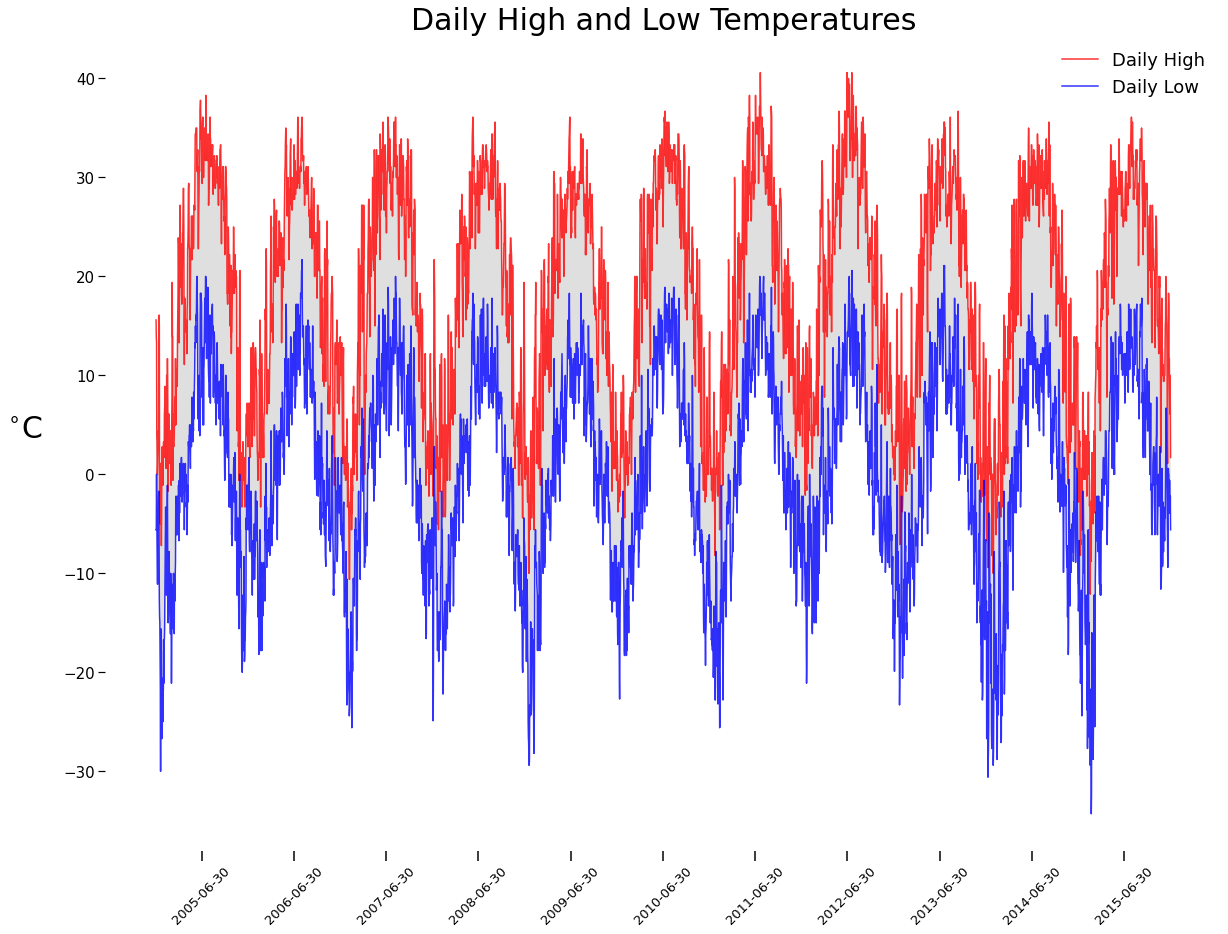

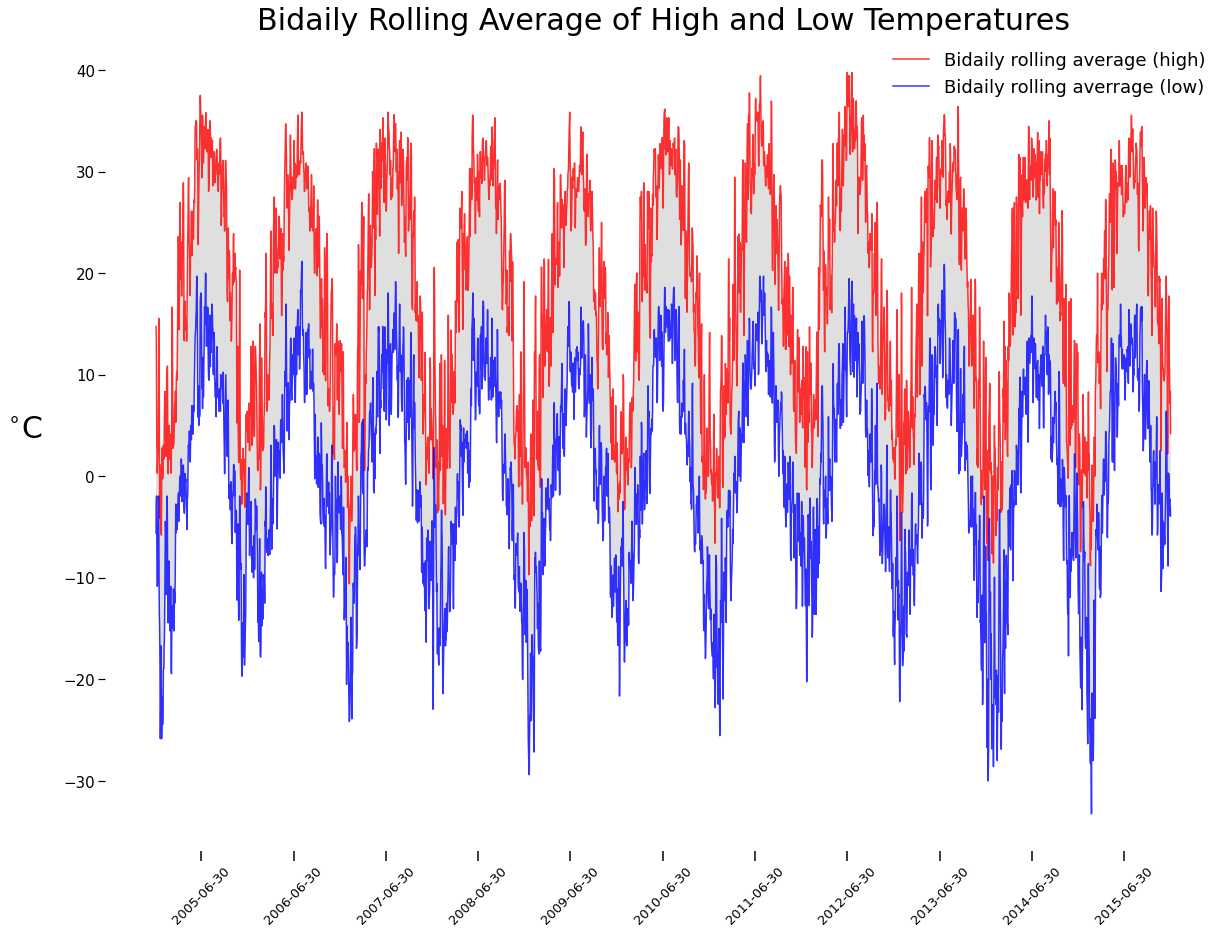

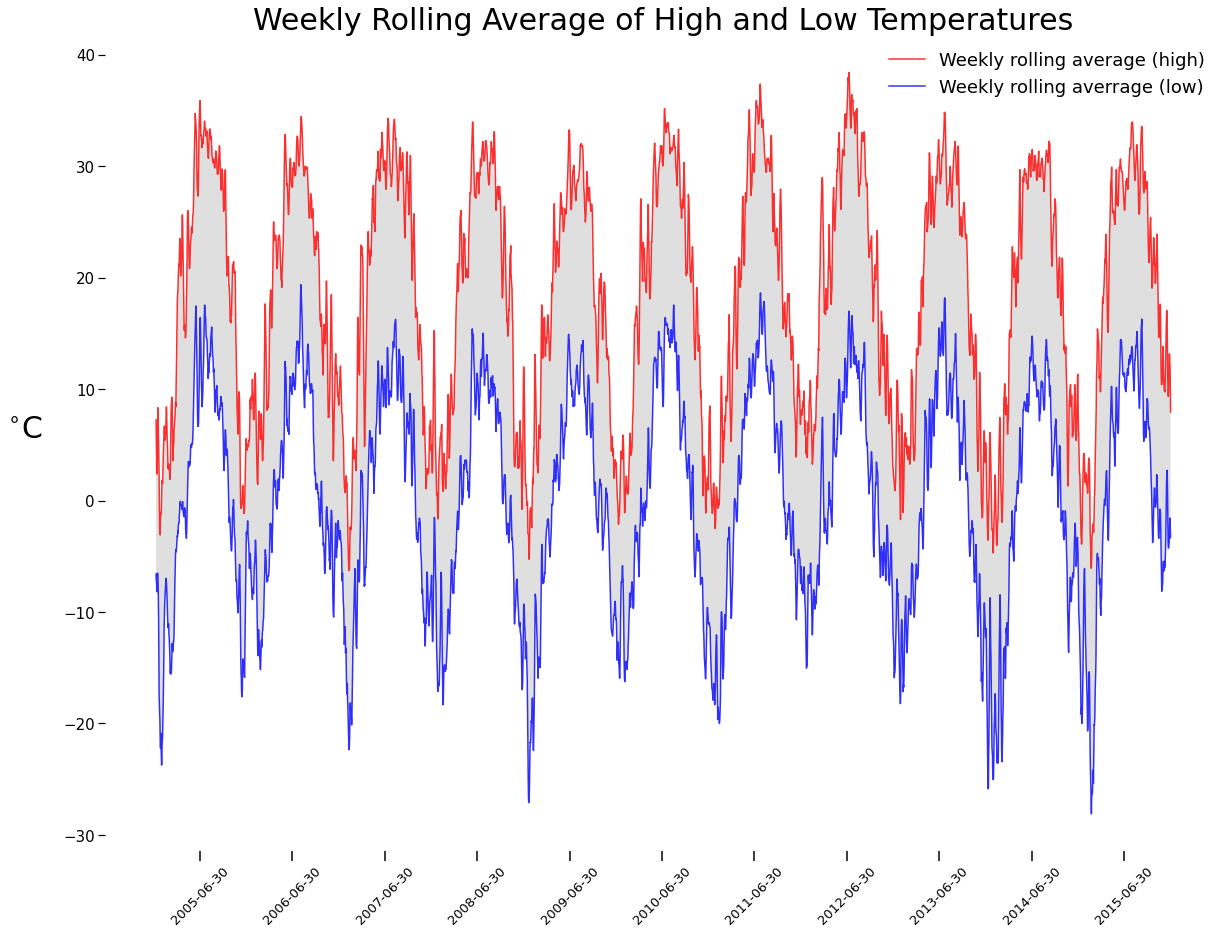

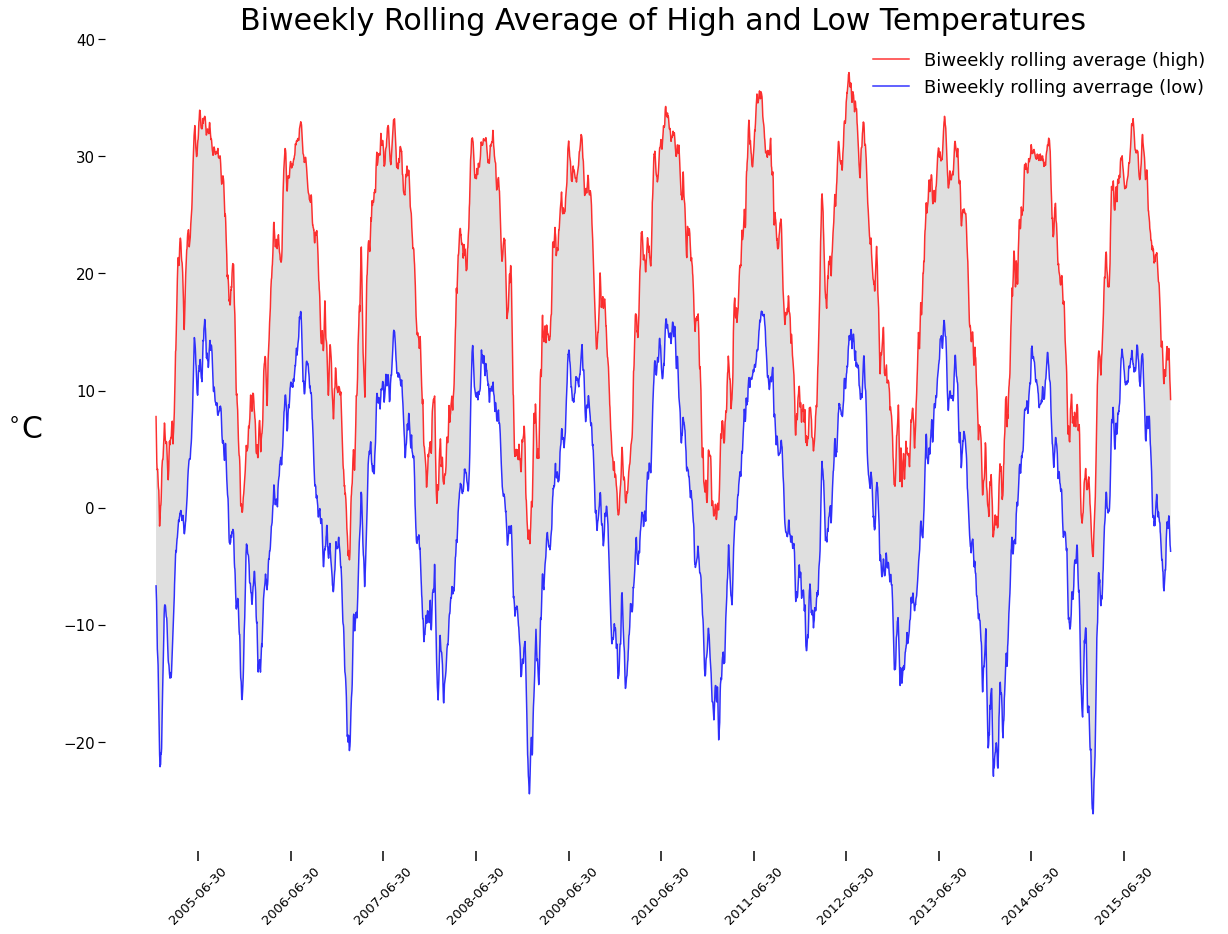

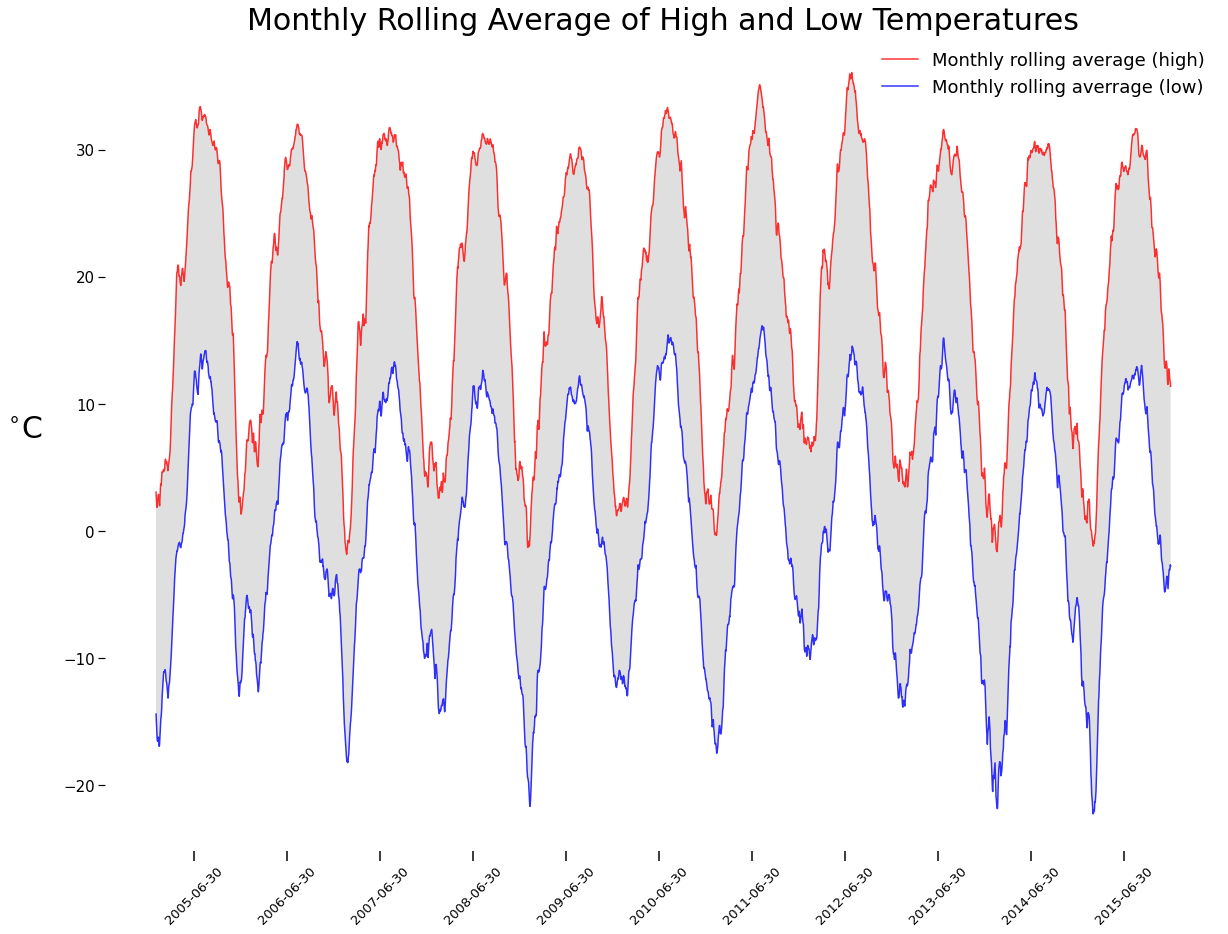

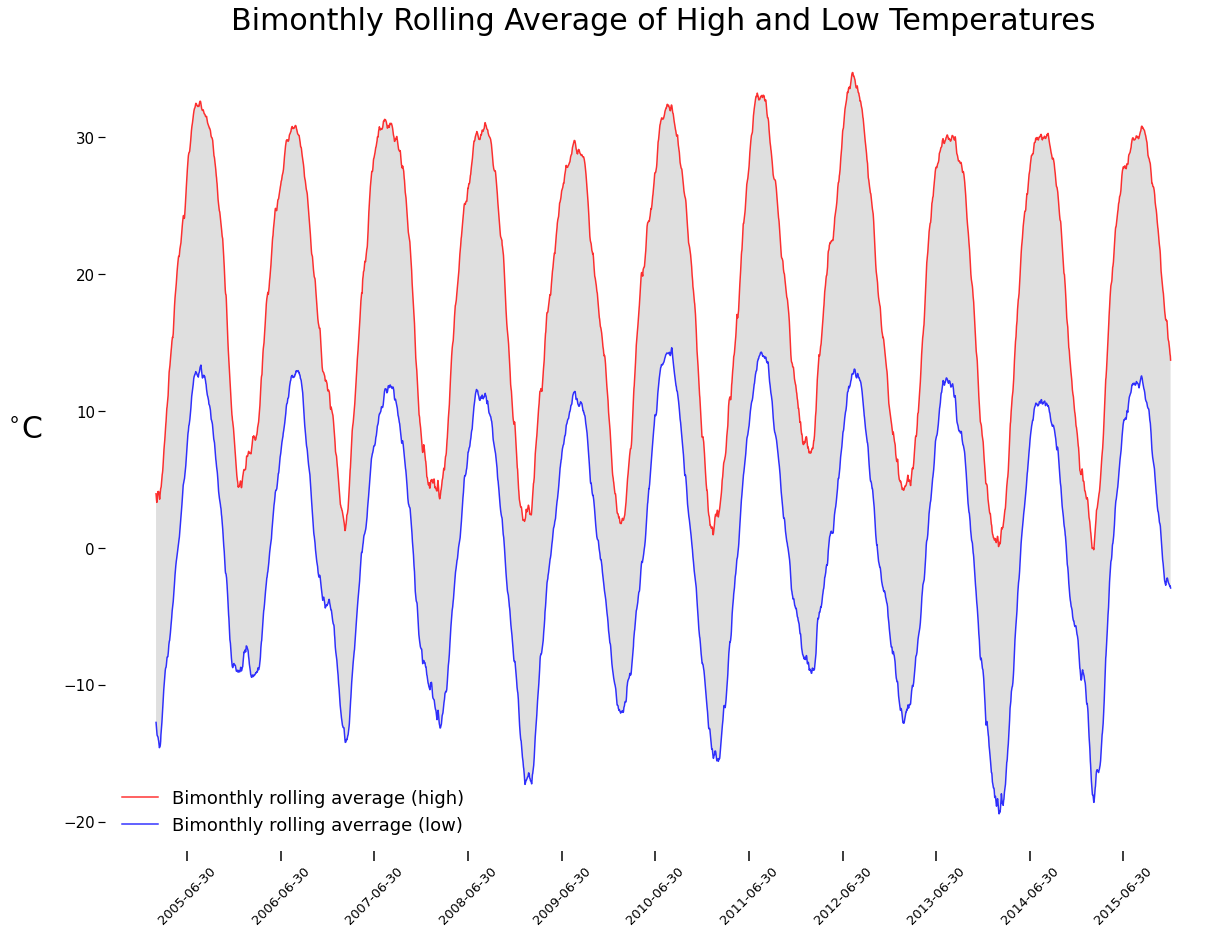

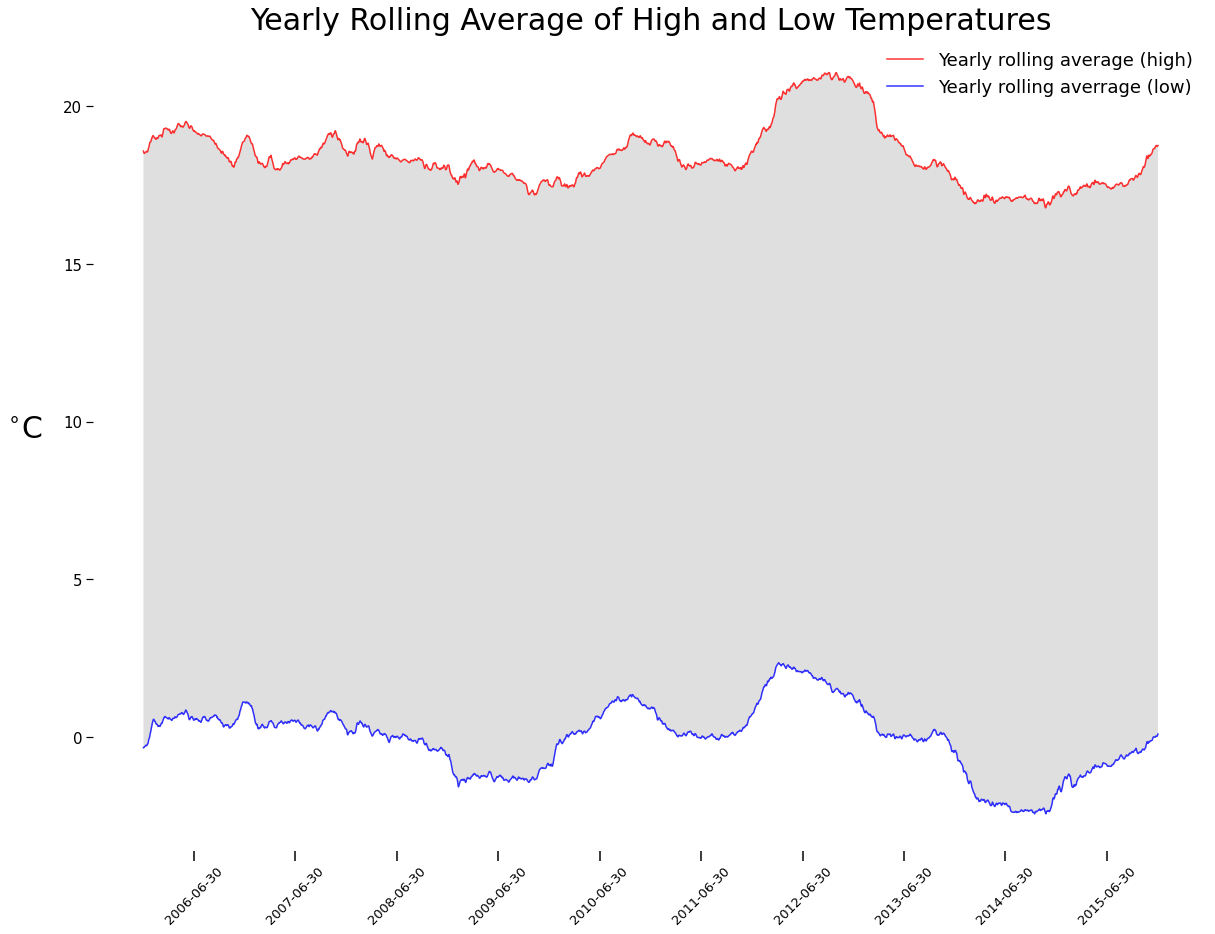

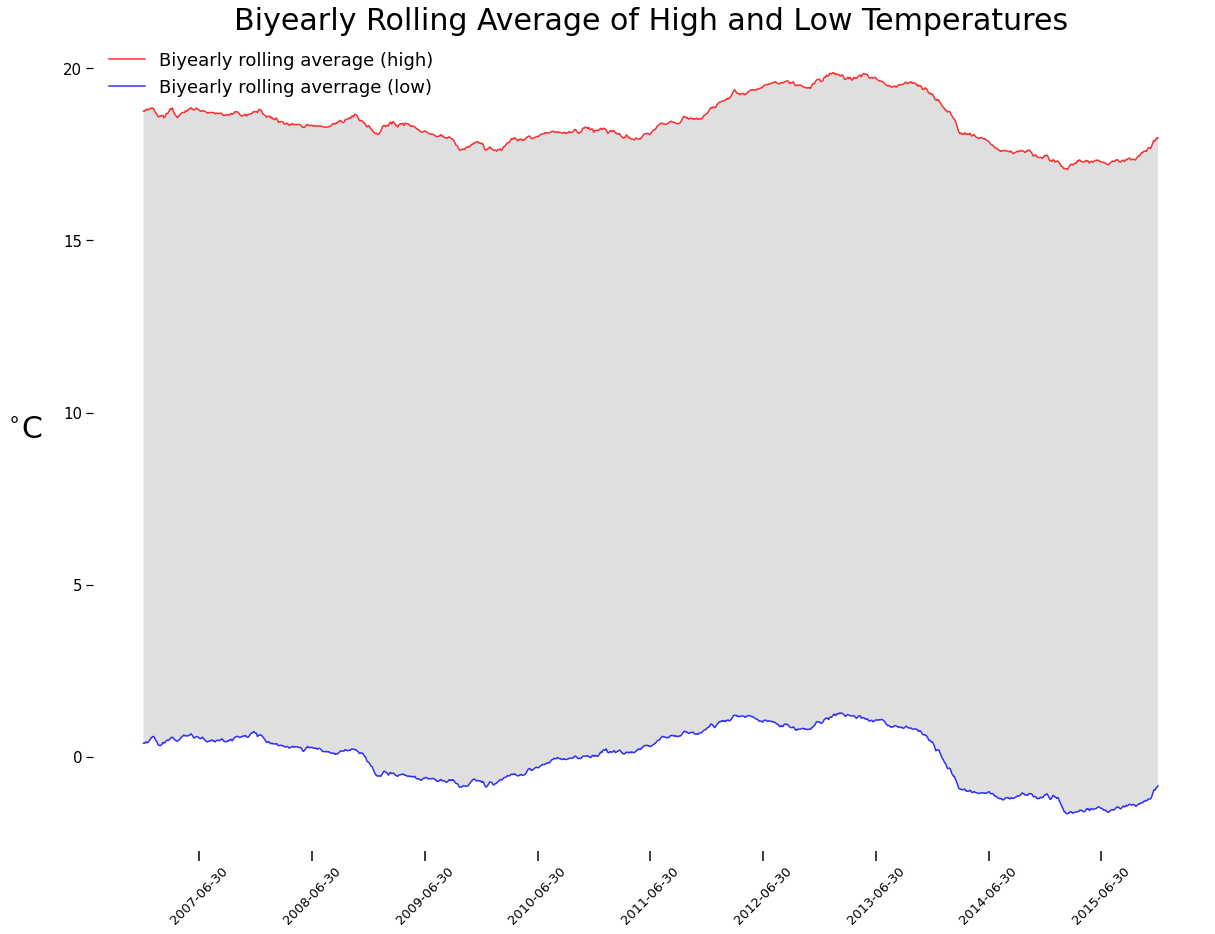

In [104]:
periods = {'Daily' : 1, 'Bidaily' : 2, 'Weekly' : 7, 'Biweekly' : 14, 'Monthly' : 30, 'Bimonthly' : 60, 'Yearly' : 
           365, 'Biyearly' : 730}

for key in periods:
    rollup = produce_dataframes(df, periods, key)
    plot_dataframes(rollup, periods, key)